In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

## Step 1 : Load dataset 

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(127)

In [13]:
df_new = df.drop_duplicates()

In [14]:
df_new

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Step 3 : Problem Identification (Regression or Classification)

 I want my model to predict Performance based on the input features i.e. Hours studied, Previous scores, Sample question papers practiced. So this is the Regression problem
The equation of Linear model (based on two input features i.e. Gender and Height) Y = w1X1 + w2X2 + ... + c ---> eq(1) Where, Y --> Predicted output w1, w2--> coefficients (weights for each feature) X1, X2--> Bias or intercept

# Step 4: Find correlation between input features and the output (numerical or graphical)

In [16]:
df_new.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [18]:
df_new = df_new.drop("Extracurricular Activities",axis=1)

In [19]:
df_new

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [20]:
df_new.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


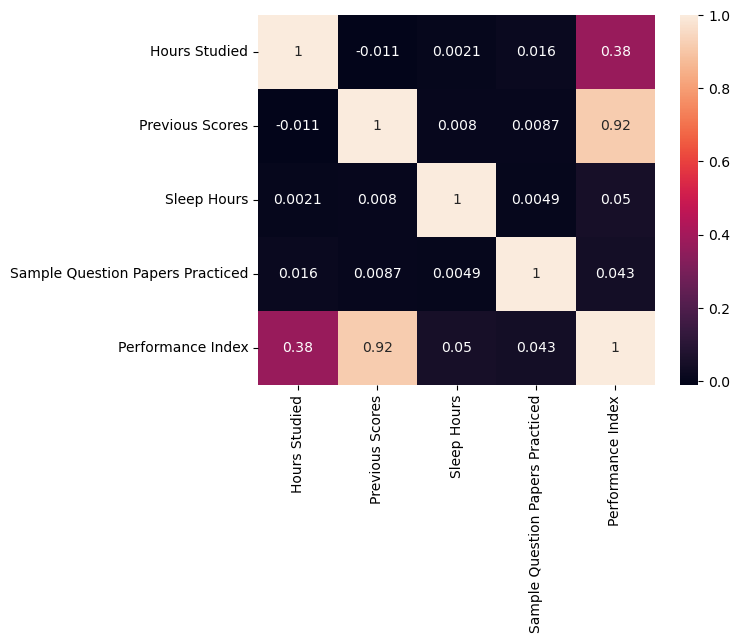

In [21]:
sns.heatmap(df_new.corr(),annot = True)
plt.show()

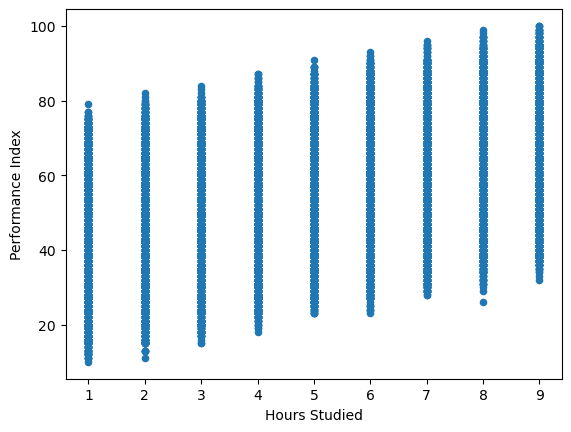

In [22]:
df_new.plot(x = "Hours Studied" , y = "Performance Index" , kind = "scatter")
plt.show()

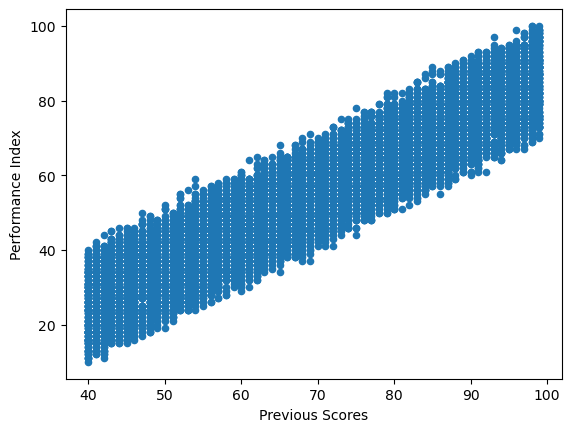

In [23]:
df_new.plot(x = "Previous Scores" , y = "Performance Index" , kind = "scatter")
plt.show()

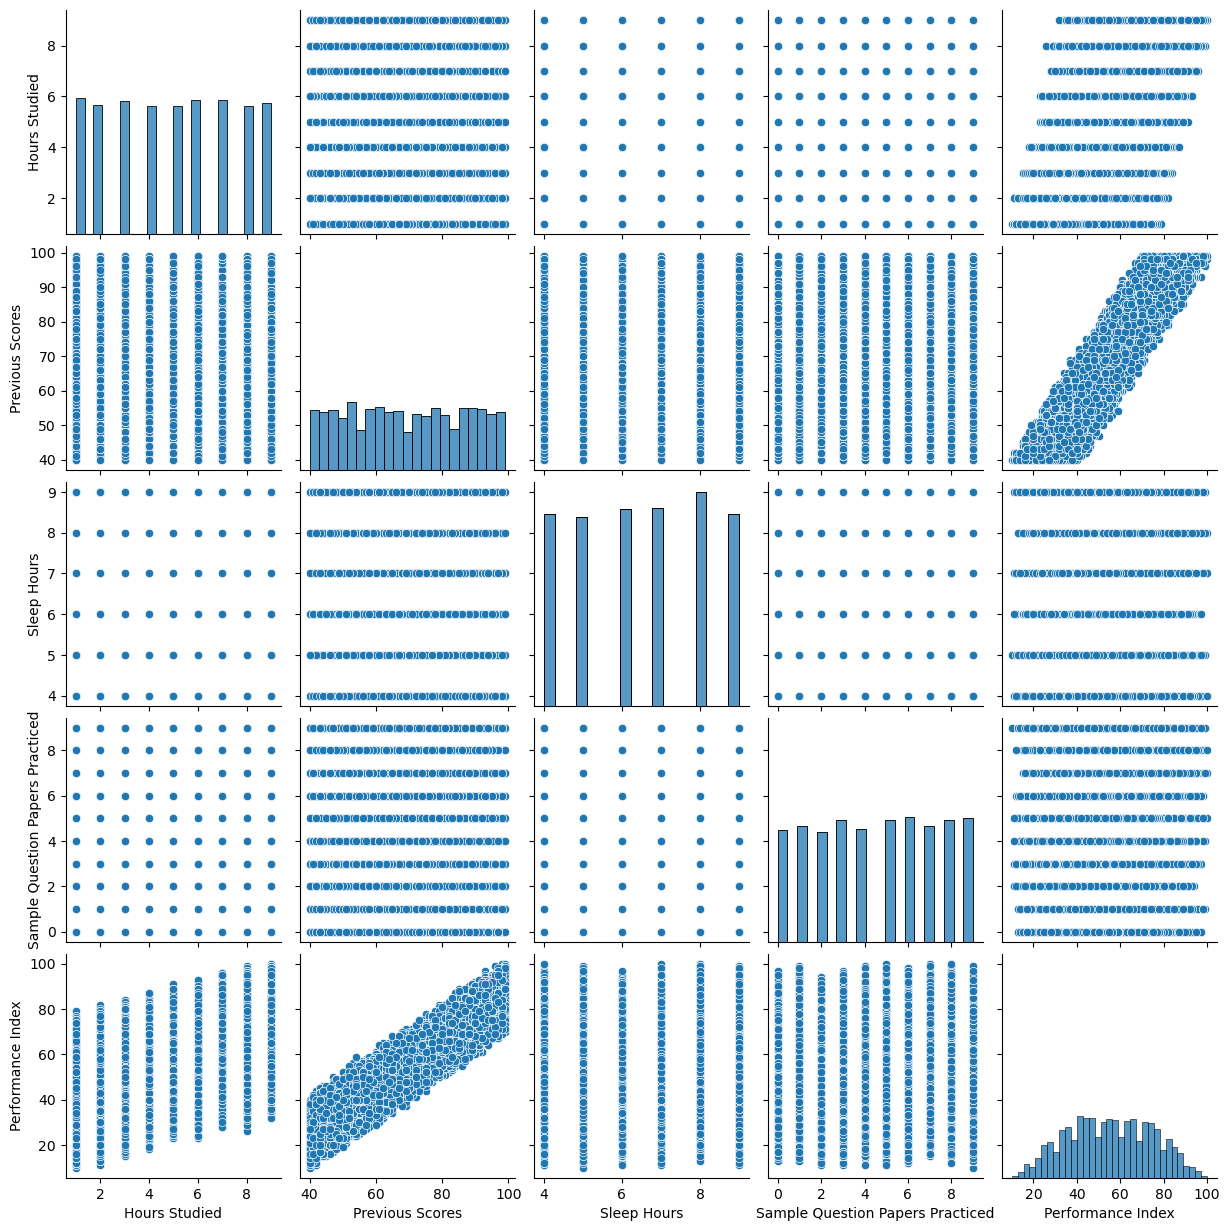

In [24]:
sns.pairplot(df_new)

# Step 5: Select Model

I have selected linear regression model

# Step 5: seperate inputs and outputs

In [26]:
df_new.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [27]:
X = df_new.drop(['Sleep Hours','Sample Question Papers Practiced','Performance Index'] , axis = 1)
y_true = df_new['Performance Index']

In [28]:
X

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [30]:
y_true

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [31]:
X_train , X_test ,y_train ,y_test =train_test_split(X , y_true , test_size = 0.3 , random_state = 59)

In [33]:
X_train

,Hours Studied,Previous Scores
5954,1,92
2578,3,51
9145,2,67
3262,9,46
6227,1,75
...,...,...
6403,8,46
9702,3,83
663,9,87
7669,6,81


In [34]:
y_train

5954    66.0
2578    34.0
9145    50.0
3262    43.0
6227    50.0
        ... 
6403    41.0
9702    66.0
663     86.0
7669    71.0
4296    62.0
Name: Performance Index, Length: 6911, dtype: float64

# Step 7 : load Model

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [36]:
lr_model.coef_

array([2.86646906, 1.01900407])

In [37]:
lr_model.intercept_

np.float64(-29.850380518166126)

Y = (2.8644)(Hours Studied) + (1.0161)(Previous Scores)- 29.6053

# Step 8: Evaluate model performance - on training data

In [38]:
y_p = lr_model.predict(X_train)

In [39]:
print("MSE :", mean_squared_error(y_train,y_p))
print("RMSE :", root_mean_squared_error(y_train,y_p))
print("MAE :", mean_absolute_error(y_train,y_p))
print("R2 score :", r2_score(y_train,y_p))

MSE : 5.191550765290511
RMSE : 2.2784974797639146
MAE : 1.8154262711419926
R2 score : 0.9860324363344286


# Step 9 : Evaluate Preformance on testing data

In [40]:
X_test

,Hours Studied,Previous Scores
6569,3,72
3272,8,65
7312,4,49
4624,9,57
202,9,52
...,...,...
9092,9,51
8061,8,49
2300,9,64
1295,6,96


In [41]:
y_test

6569    50.0
3272    61.0
7312    35.0
4624    54.0
202     48.0
        ... 
9092    50.0
8061    40.0
2300    63.0
1295    84.0
4576    71.0
Name: Performance Index, Length: 2962, dtype: float64

In [42]:
y_p = lr_model.predict(X_test)

In [43]:
print("MSE :", mean_squared_error(y_test,y_p))
print("RMSE :", root_mean_squared_error(y_test,y_p))
print("MAE :", mean_absolute_error(y_test,y_p))
print("R2 score :", r2_score(y_test,y_p))

MSE : 5.360209080207396
RMSE : 2.315212534565109
MAE : 1.8446258693400508
R2 score : 0.9852100741378855


Adjusted R2

In [45]:
X_train.shape

(6911, 2)

In [46]:
r2  = r2_score(y_test,y_p)
n,p = X_train.shape

adjusted_r2 = 1 - (1 - r2) * ((n-1)/(n-p-1))
print('Adjusted R2 :', adjusted_r2)

Adjusted R2 : 0.9852057921674564


# Prediction on Input

In [48]:
study_hours = float(input("Enter study hours"))
previous_score = float(input("Enter previous score : "))

performance_p = lr_model.predict([[study_hours,previous_score]])
print("Predicted Peformance", performance_p)

Enter study hours 9
Enter previous score :  86


Predicted Peformance [83.5821914]


D:\New folder\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 10 : Save the model

In [49]:
import pickle

In [50]:
with open("Student_performance_prediction.pkl",mode ="wb" ) as f:
  pickle.dump(lr_model,f)

# Step 11 : Deplyment

In [51]:
with open("Student_performance_prediction.pkl",mode ="rb") as f:
  loaded_model = pickle.load(f)